In [1]:
import pandas as pd
import sqlalchemy
import mysql.connector
import matplotlib as mpl    
import matplotlib.pyplot as plt
import seaborn as sns
#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  

sys.path.insert(0, "/home/apprenant/Desktop/AmericanDream/")


#On peut ensuite importer le dossier comme un module

from src.d00_utils.mysql_utils import mysql_connect, save_to_mysql
connect = mysql_connect()

In [3]:
data = pd.read_sql("Analyst_01_v1.0",con=connect)
data2 = pd.read_sql("Salary_01_v1.0",con=connect)

In [4]:
data2.head()


,level_0,index,SalaryUSD,Country,PostalCode,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties
0,0,0,115000.0,United States,03,Full time employee,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked
1,1,1,100000.0,United States,None,Full time employee,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked
2,3,3,70000.0,United States,94133,Full time employee,Analyst,No,3,1 (this is the only company where I've had thi...,2,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked
3,4,4,110000.0,United States,95354,Full time employee,DBA (General - splits time evenly between writ...,No,25,3,None,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked
4,5,5,79500.0,United States,78727,Full time employee,Analyst,No,2,1 (this is the only company where I've had thi...,None,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked


##Question 1 : le salaire moyen au Etats Unis

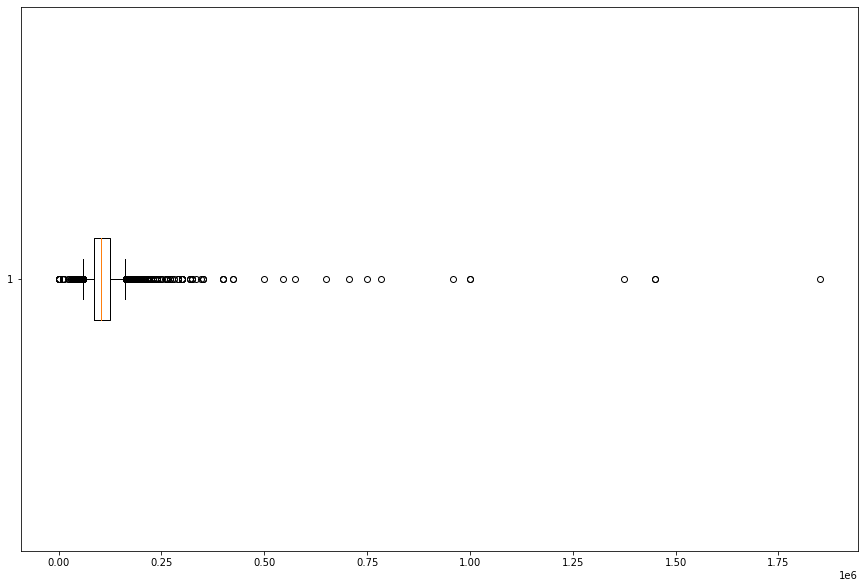

In [5]:
plt.figure(figsize = (15,10))
ax = plt.boxplot(data2["SalaryUSD"], whis=[5,95], vert=False)
plt.show()


Text(0.5, 1.0, 'Salaire moyen')

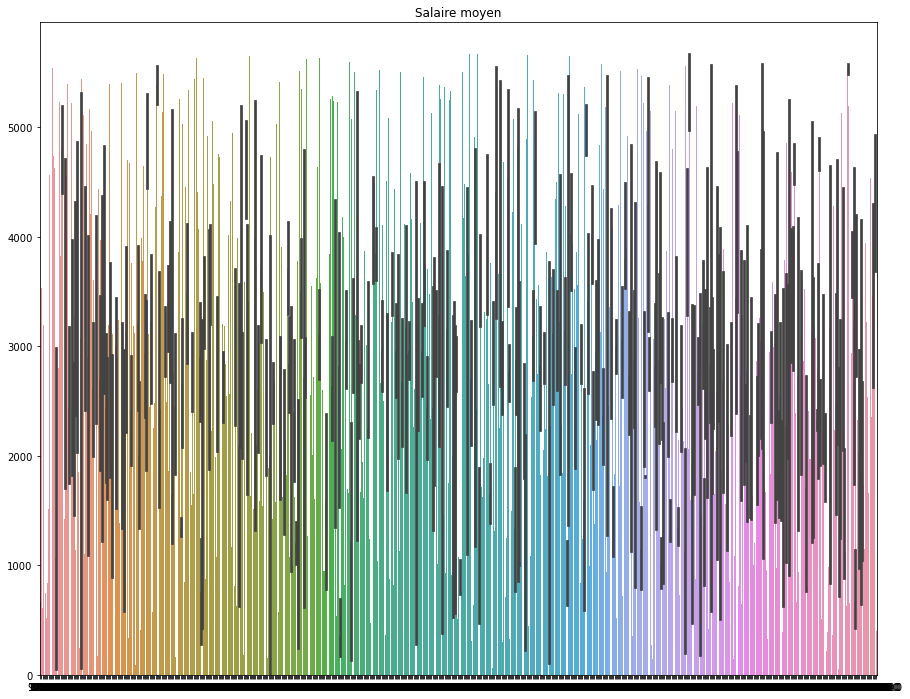

In [6]:
plt.figure(figsize=(15, 12))

sns.barplot(x=data2['SalaryUSD'], y=data2.index)

plt.xlabel("")

plt.title("Salaire moyen")


Tentative de graph pour les salaires moyen au Etats Unis, pas très lisible, je choisi donc de favoriser une réponse simple en récupèrent directement la moyenne de SalaryUSD.

In [33]:

print("le salaire moyen est de : {}" .format(data2.loc[:, 'SalaryUSD'].mean()))
   

le salaire moyen est de : 108578.98032922535


##Question 2 : le salaire median au Etats Unis

In [28]:
print("le salaire median est de : {}" .format(data2.loc[:, 'SalaryUSD'].median()))

le salaire median est de : 103000.0


##Question 3 : Le salaire moyen en fonction du job title

Text(0.5, 1.0, 'Salaire moyen selon les différent métier')

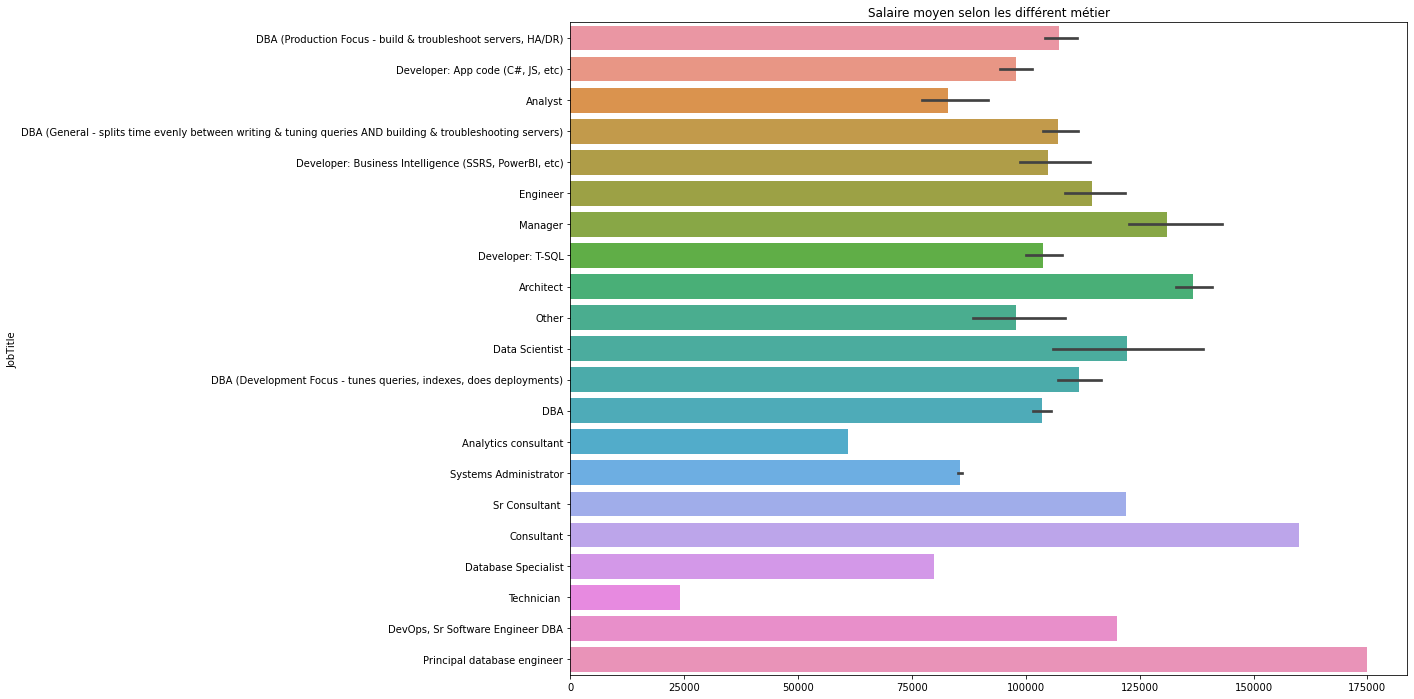

In [123]:
plt.figure(figsize=(15,12))


sns.barplot(x=data2['SalaryUSD'], y=data2.JobTitle)


plt.xlabel("")

plt.title("Salaire moyen selon les différents métier")


    Graphique qui montre le salaire moyen entre les "jobTittle" par sécurité et pour vérifier ma réponse j'ai sorti juste en dessous les réponse et nous pouvons voir que cela correspond au graphique

In [103]:
data2.groupby("JobTitle").SalaryUSD.mean()






JobTitle
Analyst                                                                                                        82939.056818
Analytics consultant                                                                                           61000.000000
Architect                                                                                                     136769.042283
Consultant                                                                                                    160000.000000
DBA                                                                                                           103484.147541
DBA (Development Focus - tunes queries, indexes, does deployments)                                            111685.581301
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    107101.333994
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  107389.114923

Voici le diagramme circulaire de la répartitions de ses jobtitles

Text(0.5, 1.0, 'JobTittle')

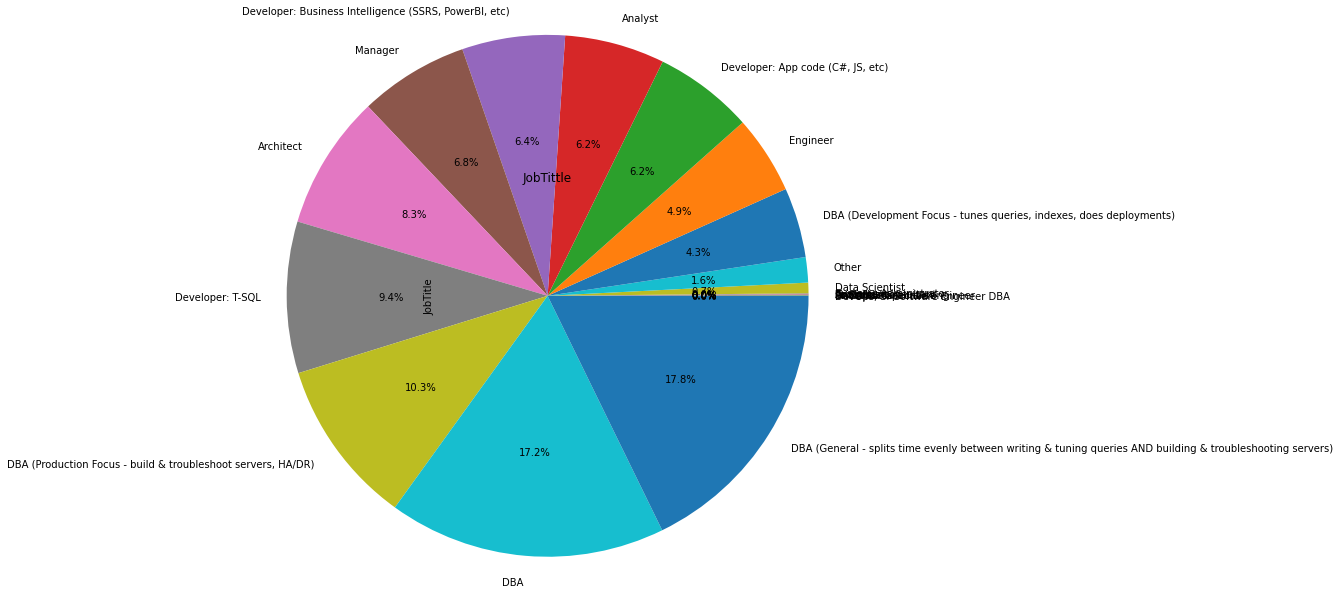

In [100]:
data = data2.groupby("JobTitle").JobTitle.count().sort_values()
data.plot.pie(autopct="%.1f%%", radius=3)
plt.title("JobTittle")

Voici le diagramme circulaire de la répartitions de ses jobtitles